# 資料視覺化作業

資料集: Titanic: Machine Learning from Disaster:

[https://www.kaggle.com/competitions/titanic/overview](https://www.kaggle.com/competitions/titanic/overview)

## 載入套件和資料

1. 安裝套件
2. 載入套件
3. 載入資料
4. 檢視資料

In [15]:
# uncommit if you're not install required packages.
# pip install -r requirements.txt

In [16]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# 讓你的圖形直接嵌入到 Notebook 中，而不是另開視窗。
%matplotlib inline

train_df = pd.read_csv('./titanic/train.csv')
test_df = pd.read_csv('./titanic/test.csv')
combine = [train_df, test_df]

In [17]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [19]:
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## 資料前處理

### 刪除含有缺失值的行或列

這種方法最簡單，但當缺失值不多時才適用。如果刪除過多，可能會導致資訊的大量丟失。

In [20]:
# 檢視缺失值
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [21]:
# 刪除任何含有缺失值的行
cleaned_df = train_df.dropna()

# 只刪除特定列有缺失值的行
# cleaned_df = train_df.dropna(subset=['Age'])

# 刪除含有缺失值的列（通常不推薦，除非該列大部分值都是缺失的）
# cleaned_df = train_df.drop(columns=['Cabin'])

In [22]:
# 再次檢視缺失值
print(cleaned_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## 開始製圖


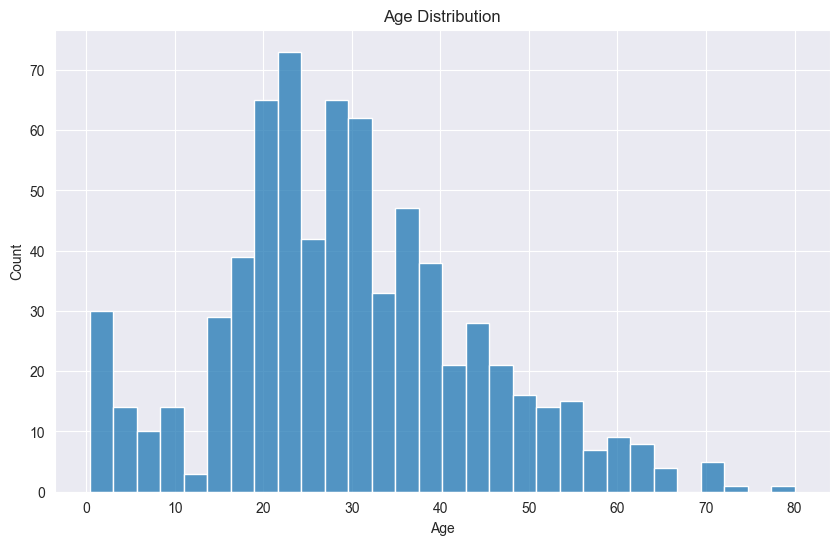

In [23]:
# 年齡分佈直方圖
plt.figure(figsize=(10,6))
sns.histplot(train_df['Age'].dropna(), kde=False, bins=30)
plt.title('Age Distribution')
plt.show()

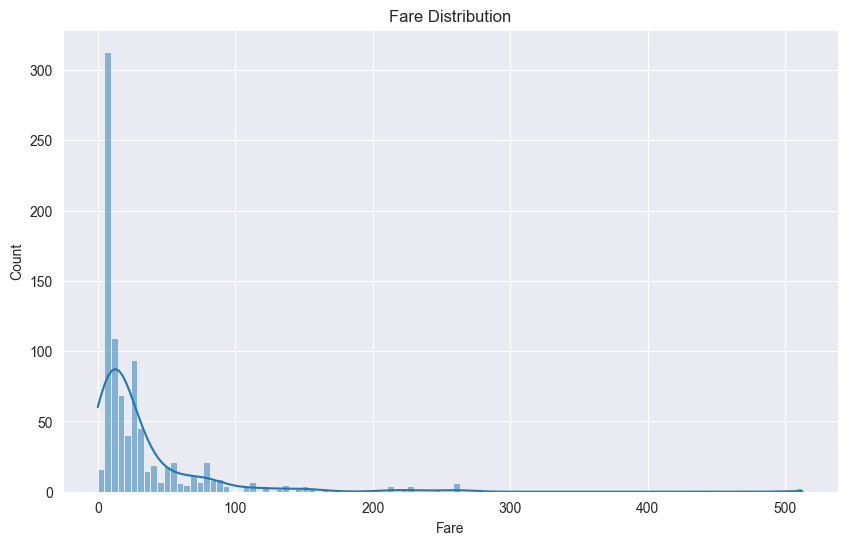

In [24]:
# 票價分佈直方圖
plt.figure(figsize=(10,6))
sns.histplot(train_df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()


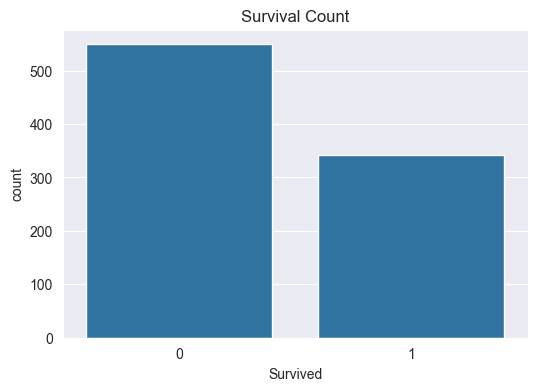

In [25]:
# 生存與否的計數圖
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()

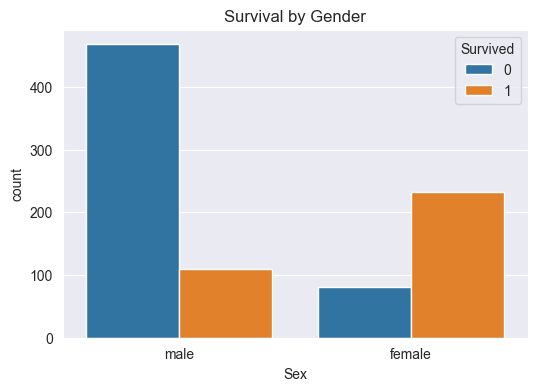

In [26]:
# 性別與生存關係的計數圖
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival by Gender')
plt.show()


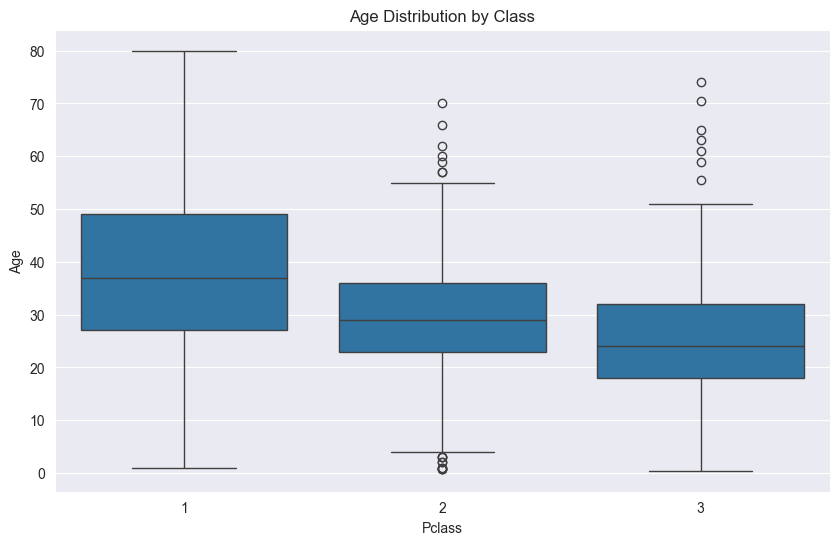

In [27]:
# 箱形圖檢查年齡和艙等的關係
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Age', data=train_df)
plt.title('Age Distribution by Class')
plt.show()